##Contents:
<ul>
  <li>Logistic Regression</li>
  <li>An implementation of Logistic Regression</li>
</ul>

#Logistic Regression

It is similar to Linear Regression, except that Logistic Regression predicts a response variable that is categorical, instead of predicting something continuous (like price), like whether something is true or false.

Instead of fitting a polynomial curve to a data, logistic regression fits an S-shaped "logistic function" to the data. Unlike linear regression model, that uses Ordinary Least Square for parameter estimation, we use Maximum Likelihood Estimation. There can be infinite sets of regression coefficients. The maximum likelihood estimate is that set of regression coefficients for which the probability of getting the data we have observed is maximum.

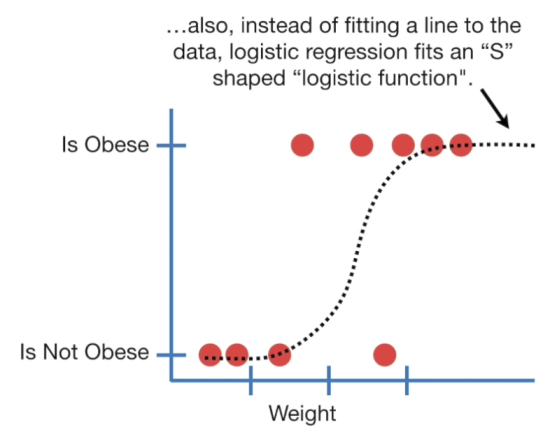

<br>

##Types of Logistic Regression##
1.**Binary Logistic Regression**: The categorical response has only two 2 possible outcomes. Example: Spam or Not. 

2.**Multinomial Logistic Regression**: Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

3.**Ordinal Logistic Regression**: Three or more categories with ordering. Example: Movie rating from 1 to 5. 

<br>

##Why Logistic, not Linear?##

With binary classification, let ‘x’ be some feature and ‘y’ be the output which can be either 0 or 1.

Linear regression model can generate the predicted probability as any number ranging from negative to positive infinity, whereas probability of an outcome can only lie between 0< P(x)<1.

Also, Linear regression has a considerable effect on outliers.
To avoid this problem, log-odds function or logit function is used.
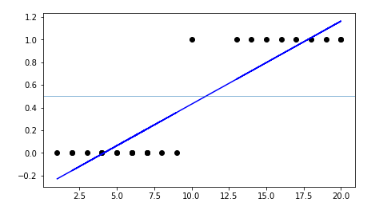

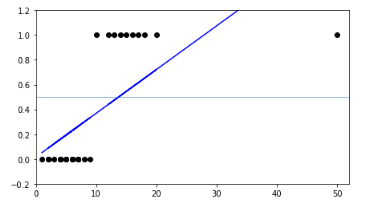



#Logit Funtion

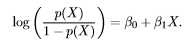

Also, it is trivial to have a value more than 1 or less than 0 when we're trying to assign discrete values of either a 0 or a 1. So, we use what is called the "logistic function/logit function/log odds function", basically all of which are same as a sigmoid function, which basically takes input of any value and squiggles it to produce an output lying between 0 and 1 to get a predictive probability.

 \begin{align*}& h_\theta (x) = g ( \theta^T x ) \newline \newline& z = \theta^T x \newline& g(z) = \dfrac{1}{1 + e^{-z}}\end{align*}

 The sigmoid function looks something like this:
 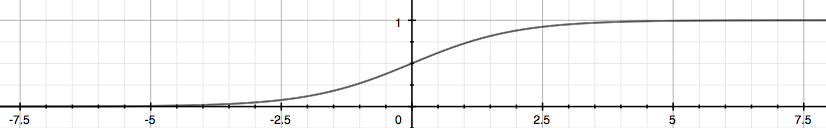

 The value of h(x) above gives us the probability that the output is 1. The concepts from binary logistic regression can also be extended to the multinomial case.

**Decision Boundary**
For getting our discrete valued output we can use the given method to classify:

\begin{align*}& h_\theta(x) \geq 0.5 \rightarrow y = 1 \newline& h_\theta(x) < 0.5 \rightarrow y = 0 \newline\end{align*}

The predictor we're using returns values between 0 and 1, so to map this to a discrete class we use what is called the decision boundary. It separates the respective areas of output 0 and output 1 in our above case. 

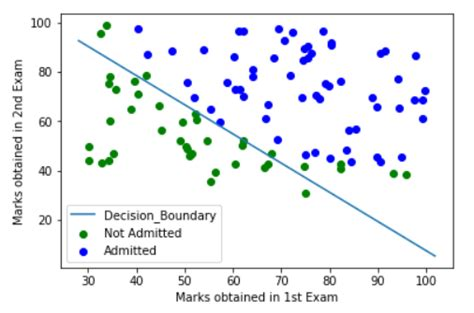

The above image can be used to illustrate what a decision boundary is. The decision boundary isn't necessarily a straight line, if we have a hypothesis function of the form ${x_1^2} + {x_2^2} -1$ for instance, we get a circular decision boundary (taking ${x_1},{x_2}$ as our axes).

**NOTE**: The input to the sigmoid function doesn't have to be a linear curve necessarily, it can be a polynomial function of higher degrees too.

##Cost Function:
The cost function in the case of a logistic regression model has the same purpose as we saw previously.

You might remember the original cost function J(θ) used in linear regression. But I can tell you right now that it's not going to work here with logistic regression. If you try to use the linear regression's cost function to generate J(θ) in a logistic regression problem, you would end up with a non-convex function: a weirdly-shaped graph with no easy way to find minimum global point, as seen in the picture below.

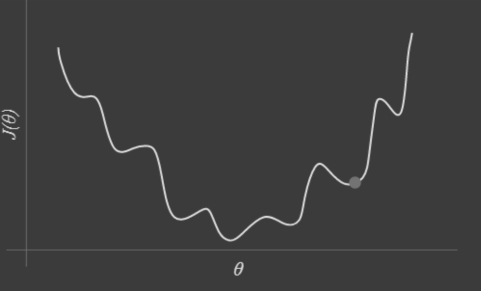

This strange outcome is due to the fact that in logistic regression we have the sigmoid function around, which is non-linear. With the J(θ) as shown above, the gradient descent algorithm might get stuck in a local minimum point. That's why we still need a neat convex function as we did for linear regression: a bowl-shaped function that eases the gradient descent function's work to converge to the optimal minimum point.

The cost function for our logistic regressor looks like this :
\begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}


The cost function when ${y = 1}$ looks like this:

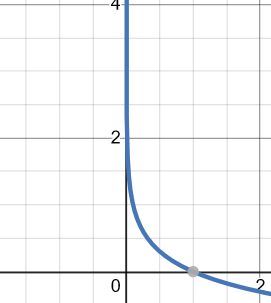

When ${y = 0}$, we get a plot like this:

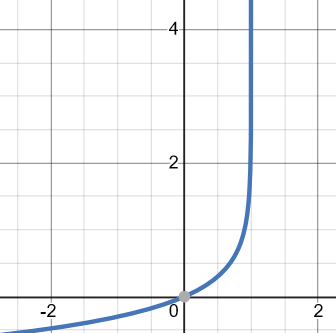

<br>

\begin{align*}& \mathrm{Cost}(h_\theta(x),y) = 0 \text{ if } h_\theta(x) = y \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 0 \; \mathrm{and} \; h_\theta(x) \rightarrow 1 \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 1 \; \mathrm{and} \; h_\theta(x) \rightarrow 0 \newline \end{align*}

<br>

Both of the above cases can be combined to give a cost function for a logistic regressor of the form: 
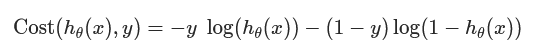

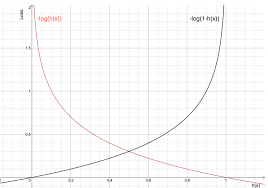

We can use gradient descent just like we did for the case of a linear regressor to find the optimal parameters for a logistic regressor too.  
Working out the partial derivative of the cost function again we get a result similar to the case of a linear regressor:
\begin{align*} & Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \newline & \rbrace \end{align*}  

We have to keep updating the value of each parameter simultaneously just like the previous case. 

##What is pytorch?

PyTorch is an optimized Deep Learning tensor library based on Python and Torch.

In machine learning, when we represent data, we need to do that numerically. A tensor is simply a container that can hold data in multiple dimensions. In mathematical terms, however, a tensor is a fundamental unit of data that can be used as the foundation for advanced mathematical operations. It can be a number, vector, matrix, or multi-dimensional array like Numpy arrays.

In PyTorch, modules are used to represent neural networks. Some of them are Autograd, nn, Optim, etc. The Optim module is a package with pre-written algorithms for optimizers that can be used to build neural networks. The nn module includes various classes that help to build neural network models. All modules in PyTorch subclass the nn module. 



##Implementation of Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#prepare data

bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

n_sample, n_features = x.shape
print(n_sample, n_features)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

#scale
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

569 30


In [ ]:
#model

class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

In [ ]:
#loss and optimisation

learning_rate = 0.01
criterion = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
#training loop

num_epochs = 100
for epoch in range(num_epochs):
  #forward pass
  y_predicted = model(x_train)
  loss = criterion(y_predicted, y_train)

  #backward pass
  loss.backward()

  #update weights
  optimiser.step()
  optimiser.zero_grad()

  #plot
  if (epoch+1) % 10 == 0:
    print(f'epoch : {epoch+1}, loss = {loss.item():.4f}')


epoch : 10, loss = 0.4698
epoch : 20, loss = 0.4068
epoch : 30, loss = 0.3628
epoch : 40, loss = 0.3302
epoch : 50, loss = 0.3049
epoch : 60, loss = 0.2846
epoch : 70, loss = 0.2679
epoch : 80, loss = 0.2539
epoch : 90, loss = 0.2419
epoch : 100, loss = 0.2315


In [ ]:
#check accuracy

with torch.no_grad():
  y_predicted = model(x_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')

accuracy = 0.8860
